In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from data_loader import load_mouse_spermatids
from umap import UMAP

from famo.core import CORE
from famo.plotting import (
    plot_training_curve,
)

warnings.simplefilter(action="ignore", category=FutureWarning)

/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mdata = load_mouse_spermatids()

In [4]:
model = CORE(device="cuda")
model.fit(
    n_factors=10,
    data={"mrna_allelic": mdata["mrna_allelic"]},
    likelihoods={"mrna_allelic": "BetaBinomial"},
    factor_prior="Normal",
    weight_prior="ARD_Spike_and_Slab",
    lr=0.005,
    early_stopper_patience=500,
    print_every=100,
    max_epochs=10000,
    save=True,
    save_path=None,
    init_factors="random",
    init_scale=0.1,
    batch_size=10000,
)

Setting up device...
- No device id given. Using default device: 0
- Running all computations on `cuda:0`
Fitting model...
- Checking compatibility of provided likelihoods with data.
  - mrna_allelic: BetaBinomial
- Removing constant features in group_1/mrna_allelic.
  - Removed 90 features: 1700066B17Rik_alt,Gm13266_alt,Pcsk1n_alt,Hdac6_alt,Ppp1r2-ps7_alt,Rhox8_alt,Utp14a_alt,1700080O16Rik_alt,Gm14664_alt,4931400O07Rik_alt,3830417A13Rik_alt,Gm1141_alt,Mageb5_alt,Gm5941_alt,1700003E24Rik_alt,Maged1_alt,Yipf6_alt,Rps4x_alt,Cited1_alt,1700011M02Rik_alt,Gm732_alt,Cpxcr1_alt,Tmsb15a_alt,Tmsb15b2_alt,Mum1l1_alt,Ribc1_alt,Rnf138rt1_alt,Zrsr2_alt,Piga_alt,Asb9_alt,1700021J08Rik_alt,Gm15904_alt,Gm16015_alt,Rpl37rt_alt,Reg3g_alt,Timm23_alt,1700096J18Rik_alt,4933434M16Rik_alt,Hist1h2al_alt,mt-Nd5_alt,1600014K23Rik_alt,BC049702_alt,4930428D18Rik_alt,1700019B21Rik_alt,1700012L04Rik_alt,1700066B17Rik_ref,Gm13266_ref,Pcsk1n_ref,Hdac6_ref,Ppp1r2-ps7_ref,Rhox8_ref,Utp14a_ref,1700080O16Rik_ref,Gm14664_

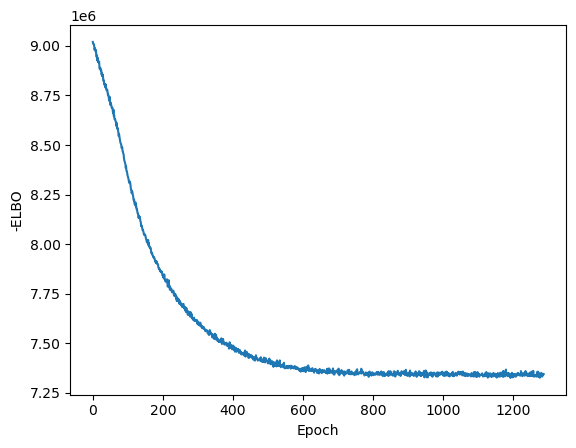

In [5]:
plot_training_curve(model)

In [6]:
factors = model.get_factors()
weights = model.get_weights()

In [7]:
factors_reducer = UMAP()
factors_reducer.fit(factors["group_1"].T)
factors_umap = factors_reducer.transform(factors["group_1"].T)

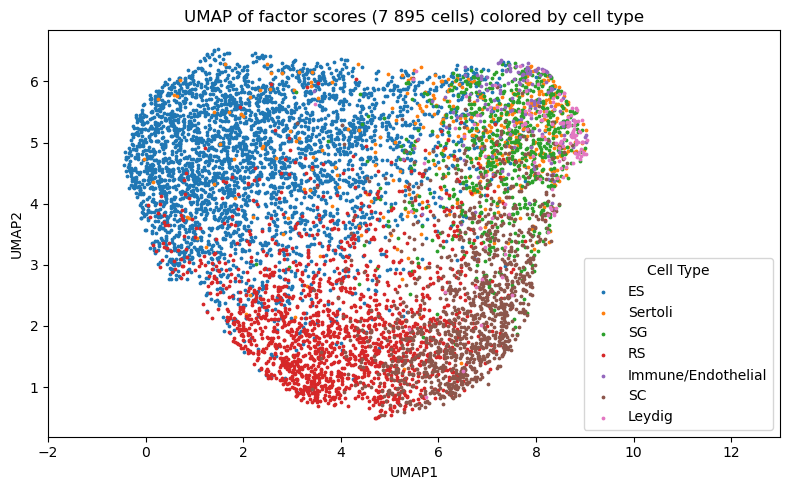

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

cell_types, indices = pd.factorize(mdata["mrna_allelic"].obs["CellType"])

scatter_plots = []
for i, cell_type in enumerate(set(cell_types)):
    scatter = ax.scatter(
        factors_umap[cell_types == cell_type, 0],
        factors_umap[cell_types == cell_type, 1],
        s=3,
        c=f"C{i}",
        label=indices[cell_type],
    )
    scatter_plots.append(scatter)

ax.set_title("UMAP of factor scores (7 895 cells) colored by cell type")
ax.set_xlim(-2, 13)
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")

ax.legend(handles=scatter_plots, title="Cell Type", loc="lower right")

plt.tight_layout()
plt.show()

/tmp/ipykernel_119946/2864238342.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[factor].set_xticklabels(box_plot.get_xticklabels(), rotation=90)
/tmp/ipykernel_119946/2864238342.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[factor].set_xticklabels(box_plot.get_xticklabels(), rotation=90)
/tmp/ipykernel_119946/2864238342.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[factor].set_xticklabels(box_plot.get_xticklabels(), rotation=90)
/tmp/ipykernel_119946/2864238342.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[factor].set_xticklabels(box_plot.get_xticklabels(), rotation=90)
/tmp/ipykernel_119946/2864238342.py:9: UserWarni

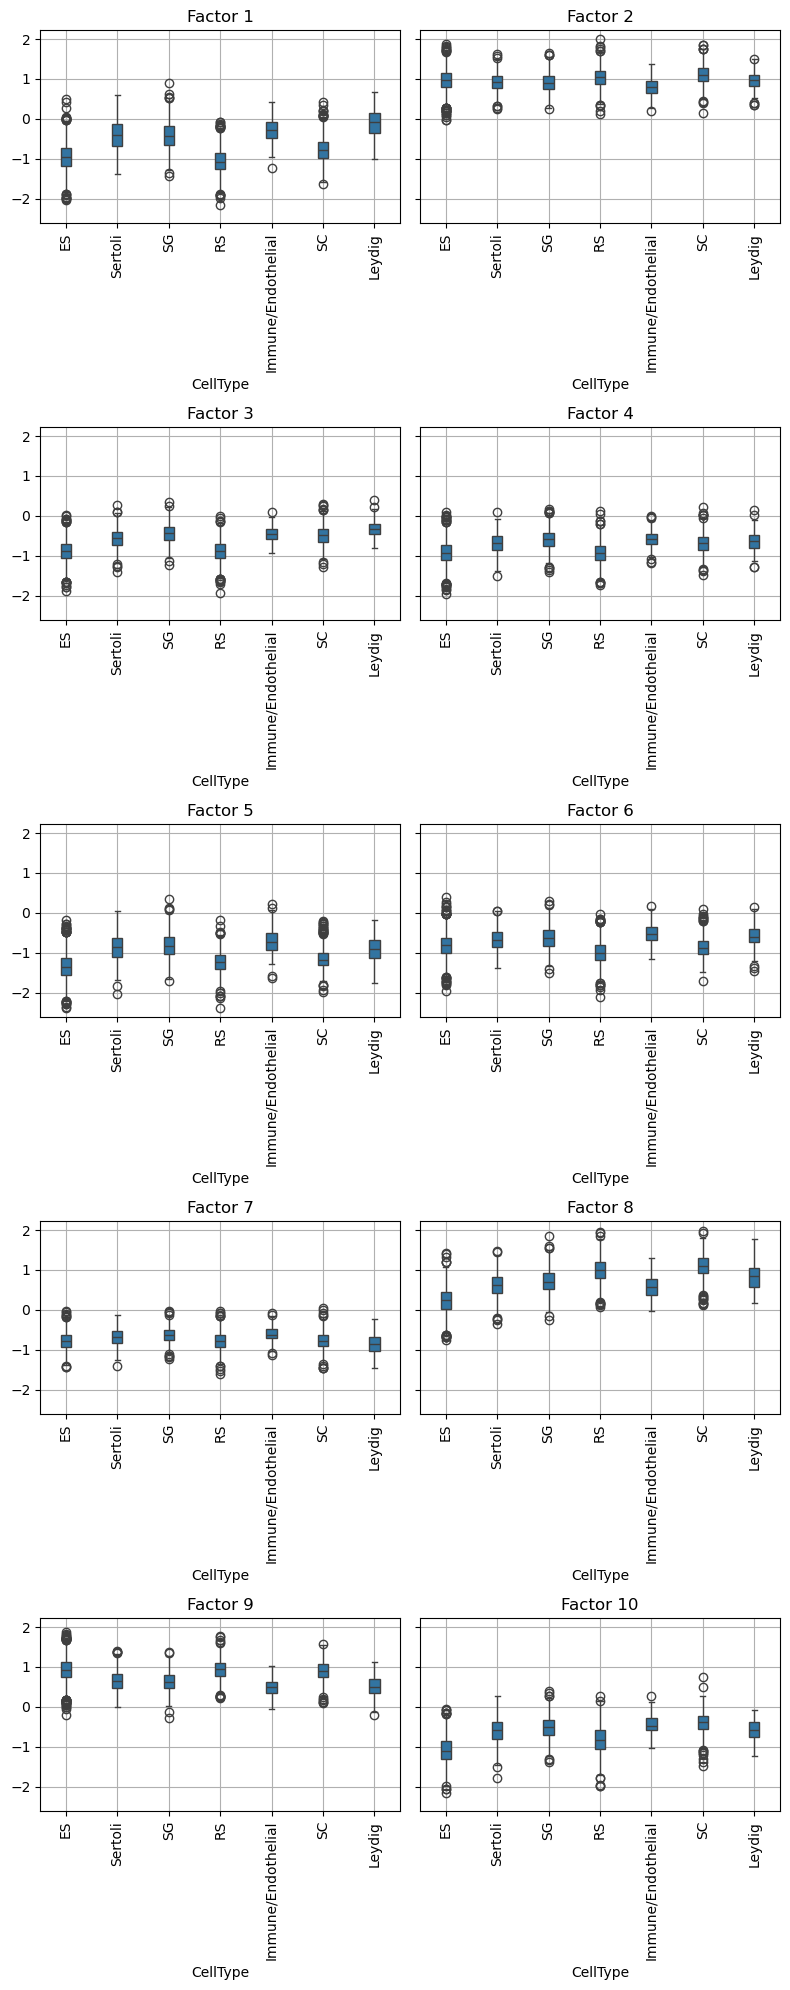

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(5, 2, figsize=(8, 20), sharey=True)  # Adjust the size as needed
axs = axs.ravel()

for factor in range(10):
    box_plot = sns.boxplot(
        x="CellType", y=factors["group_1"][factor], data=mdata["mrna_allelic"].obs, ax=axs[factor], width=0.2
    )
    axs[factor].set_xticklabels(box_plot.get_xticklabels(), rotation=90)
    axs[factor].grid()
    axs[factor].set_title(f"Factor {factor+1}")

plt.tight_layout()
plt.show()

In [10]:
weights_reducer = UMAP()
weights_reducer.fit(weights["mrna_allelic"].T)
weights_umap = weights_reducer.transform(weights["mrna_allelic"].T)

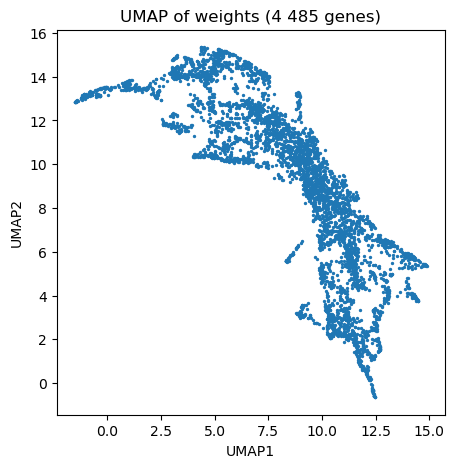

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(weights_umap[:, 0], weights_umap[:, 1], s=2)
ax.set_title("UMAP of weights (4 485 genes)")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
plt.show()